##### Dataset from: 
https://www.kaggle.com/datasets/raghadalharbi/all-products-available-on-sephora-website

##### Dataset description:
This dataset was created by Raghad Alharbi, using web scraping methods such as selenium and beautiful soup, to collect over 9000 product records from the US Sephora website (as of 2020). Product records contain multiple useful categories such as product ratings, number of reviews, price, ingredients list, etc. 

##### Research inspiration:
Today, makeup and beauty products often go viral on social media platforms such as YouTube, TikTok and Instagram. With the internet generation, much of a young person's cultural identity is formed around the chaos of what becomes viral on the internet. Think bell-bottom jeans in the 70s, or neon colours in the 80s, a number of these makeup products and beauty trends that start from internet virality, eventually cement themselves as cultural staples of the time. These often go on to shape identities and social dynamics for a new generation of people.

With this in mind, it is no surprise that popular makeup and beauty products can have a strong influence over people's purchasing decisions. It would be interesting to investigate deeper into the consumer behaviour towards extremely popular beauty products on Sephora's website.

Utilizing consumer insight statistics such as product rating scores and number of reviews, I wanted to analyze what were the most popular products, product categories, and brands on the Sephora website. From there, I also wanted to understand the tangible impacts virality had on user behaviour towards a product listing, such as the variance in product ratings and number of reviews between popular and less popular products.

##### Research questions:
With my analysis, I hope to answer the following research questions:
- What are the top 10 most highly rated products on the US Sephora website?
- Which are the top 10 product categories with the most 5.0 rated products?
- Which are the top 10 brands with the most 5.0 rated products?
- Which are the top 10 products with the most reviews? What notable characteristics do these popular products have compared with less popular products?
- Which are the top 10 brands with the most reviews? What notable characteristics do these popular brands have compared with less popular brands?

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

## Import dataset

In [2]:
df_sephora = pd.read_csv("sephora_website_dataset.csv")

#preview of dataset
df_sephora.head(3)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0


In [3]:
#dataset characteristics
df_sephora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

<b>Dataset info:</b><br>
- The dataset has 21 columns and 9168 rows
- All columns have no null values

## Analysis

<b>First, I would be looking into columns whose descriptions are unclear, to confirm what they represent:</b> <br>
Columns with clear descriptions: id, brand, category, name, size, rating, number_of_reviews, love, price, options, details, how_to_use, ingredients, online_only, exclusive, limited_edition, limited_time_offer<br>
Columns with unclear descriptions: value_price, MarketingFlags, MarketingFlags_content

<b>1. value_price: <br></b>It can be inferred that "value price" is related to "price", hence their descriptive statistics and scatterplot is charted below

             price  value_price
count  9168.000000   9168.00000
mean     50.063237     51.82359
std      47.164989     49.45902
min       2.000000      2.00000
25%      24.000000     25.00000
50%      35.000000     35.00000
75%      59.000000     60.00000
max     549.000000    549.00000


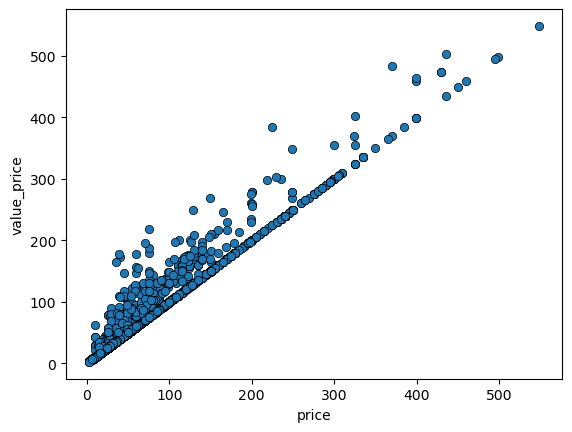

In [4]:
#descriptive statistics
describe_pvp = df_sephora[["price","value_price"]].describe()
print(describe_pvp)

#scatterplot
fig, ax = plt.subplots()
_ = plt.scatter(x=df_sephora['price'], y=df_sephora['value_price'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="price", ylabel="value_price")

- From the above, it can be concluded that "price" and "value_price" are not the same values with different column names.<br>
- Products either have a "value_price" equals to that of "price", or have a "value_price" higher than their product price. <br>
- Given the limited information, the meaning of "value_price" cannot be derived. Hence it will be excluded from the analysis

<b>2. MarketingFlags and MarketingFlags_content:</b><br>
The values for "MarketingFlags_content" seems to share a relationship with columns "online_only", "exclusive", "limited_edition", and "limited_time_offer". 
<br>Their unique values and counts for the above mentioned variables are displayed below to visualize their relationship

In [5]:
df_sephora[["MarketingFlags", "MarketingFlags_content", "online_only", "exclusive", "limited_edition", "limited_time_offer"]].value_counts()

MarketingFlags  MarketingFlags_content                            online_only  exclusive  limited_edition  limited_time_offer
False           0                                                 0            0          0                0                     4786
True            exclusive                                         0            1          0                0                     1692
                online only                                       1            0          0                0                     1528
                exclusive · online only                           1            1          0                0                      318
                limited edition · exclusive                       0            1          1                0                      297
                limited edition                                   0            0          1                0                      237
                limited edition · online only                     1   

- Marketing flags refer to product tags such as "exclusive", "online only", "limited edition", and "limited time offer"
- The "MarketingFlags" column represents whether a column posesses at least 1 marketing flag
- Products can have 1 or more of these tags, they are reflected in the "MarketingFlags_content" column.<br>
- This information is re-expressed via the boolean columns "online_only", "exclusive", "limited_edition", and "limited_time_offer". 

<b>With the column descriptions clarified, summary statistics are then loaded to understand the dataset's characteristics:</b>

<b>Categorical and boolean variables summary statistics:</b>

In [6]:
#convert "online_only", "exclusive", "limited_edition", and "limited_time_offer" from integer to boolean data type
df_sephora.iloc[:, -4:] = df_sephora.iloc[:, -4:].astype(bool)

#summary statistics table for categorical and boolean variables
catbool = ["brand", "category", "name", "size", "options", 
           "details", "how_to_use", "ingredients", "MarketingFlags", 
           "online_only", "exclusive", "limited_edition", "limited_time_offer"]
sumstat_catbool = df_sephora[catbool].describe(include = ["O", "bool"])
sumstat_catbool.T

,count,unique,top,freq
brand,9168,324,SEPHORA COLLECTION,496
category,9168,143,Perfume,665
name,9168,9106,Blush,4
size,9168,1623,no size,3161
options,9168,564,no options,8377
details,9168,8839,no details,14
how_to_use,9168,6497,no instructions,1573
ingredients,9168,6962,unknown,1630
MarketingFlags,9168,2,False,4786
online_only,9168,2,False,7015


In [7]:
#in-depth look at "brand" and "category" value counts
cat = ["brand", "category"]
for col in cat:
    print(df_sephora[col].value_counts())
    print()

brand
SEPHORA COLLECTION    496
CLINIQUE              234
tarte                 170
TOM FORD              161
Dior                  145
                     ... 
SHHHOWERCAP             1
Taste Beauty            1
bkr                     1
Cocofloss               1
DL.MD                   1
Name: count, Length: 324, dtype: int64

category
Perfume                      665
Moisturizers                 451
Face Serums                  384
Value & Gift Sets            378
Face Wash & Cleansers        247
                            ... 
Wellness                       1
High Tech Tools                1
Hair Styling & Treatments      1
Curls & Coils                  1
Lid Shadow Brush               1
Name: count, Length: 143, dtype: int64



- From the above we can see that "Sephora collection" is the brand with the most products
- "Perfume" is the product category with the most products.
- Slightly more than half of the products have at least 1 marketing flag

<b>Numerical variables summary statistics:</b>

In [8]:
#summary statistics table for numeric variables
num = ["rating", "number_of_reviews", "love", "price"]
sumstat_num = df_sephora[num].describe()
sumstat_num.T

,count,mean,std,min,25%,50%,75%,max
rating,9168.0,3.990020,1.007707,0.0,4.0,4.0,4.5,5.0
number_of_reviews,9168.0,282.139180,890.642028,0.0,10.0,46.0,210.0,19000.0
love,9168.0,16278.585079,42606.514471,0.0,1600.0,4800.0,13800.0,1300000.0
price,9168.0,50.063237,47.164989,2.0,24.0,35.0,59.0,549.0


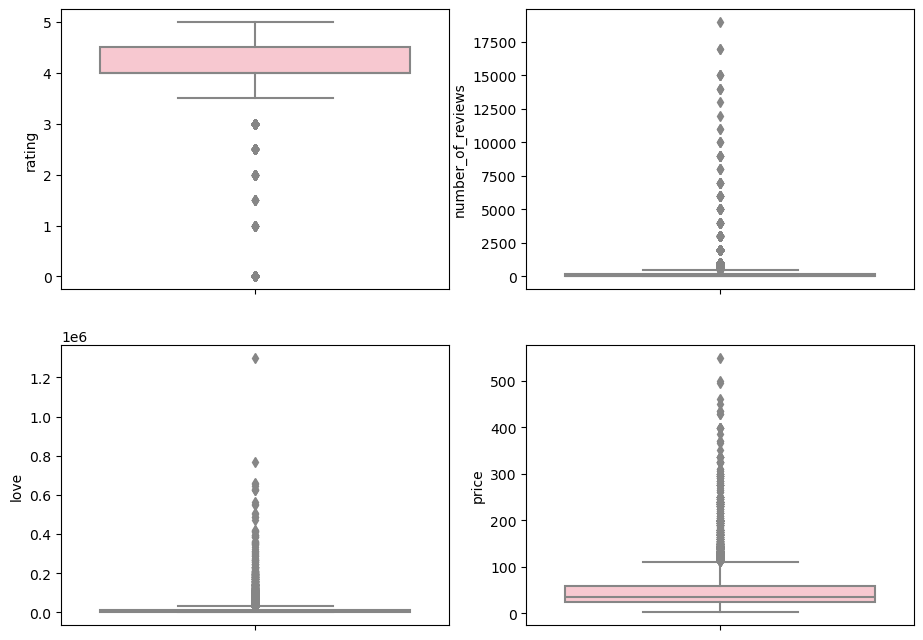

In [9]:
#boxplot for numeric variables
plt.figure(figsize = (11,8))
for i in range(len(num)):
    plt.subplot(2,2, i+1)
    sns.boxplot(y=df_sephora[num[i]], color = "pink", orient = "v")

- From the above, we can tell that the typical rating for a product is high, with the meadian rating being 4.0/5.0. Those that provide ratings of 3.0 or less are outliers.
- "number_of_reviews" and "love" variables contain a handful of outliers that deviate significantly from the median, positively skewing the sample significantly. This suggests that there are a small handful of products within the sephora site that are extremely popular, especially when compared with the rest of its products.
- The bulk of products are around $100 or less.

In [10]:
#correlation table for numeric variables
df_sephora[num].corr()

,rating,number_of_reviews,love,price
rating,1.000000,0.081478,0.094788,0.019559
number_of_reviews,0.081478,1.000000,0.746099,-0.084001
love,0.094788,0.746099,1.000000,-0.088724
price,0.019559,-0.084001,-0.088724,1.000000


- From the correlation table above, it can be seen that "love" and "number_of_reviews" have a fairly high correlation of 0.75.
- It is interesting to note that there is no significant correlation between "rating" and "number_of_reviews", "love", or "price".
    - Suggesting the initial possibility that popularity("number_of_reviews", "love") may not result in a high rating.
    - Also, how expensive or inexpensive a product is does not seem to impact its rating.

<b>With the gist of the dataset's features understood, I'll next proceed to look deeper into the relationship between variables, and start answering my research questions:</b>

As a recap, the research questions I'll be exploring would be:<br>
1. What are the top 10 most highly rated products on the US Sephora website?
2. Which are the top 10 product categories with the most 5.0 rated products?
3. Which are the top 10 brands with the most 5.0 rated products?
4. Which are the top 10 products with the most reviews? What notable characteristics do these popular products have compared with less popular products?
5. Which are the top 10 brands with the most reviews? What notable characteristics do these popular brands have compared with less-popular brands?

<b>1. What are the top 10 most highly rated products on the US Sephora website?</b>

In [11]:
#Calculates the number of products with a 5.0 rating
df_prodrating = df_sephora[df_sephora["rating"] == 5.0]
len(df_prodrating.index)

872

In [12]:
#Sorts 5.0 rated products in descending order by number of reviews. Extracts top 10 rows.
df_prodrating = df_sephora[df_sephora["rating"] == 5.0].sort_values('number_of_reviews', ascending=False).head(10)
df_prodrating[["name", "brand", "category", "number_of_reviews", "rating"]]

,name,brand,category,number_of_reviews,rating
299,Modern Renaissance Eye Shadow Palette,Anastasia Beverly Hills,Eye Palettes,8000,5.0
7364,Facial Cotton,Shiseido,Makeup Removers,2000,5.0
7123,Solid Brush and Sponge Cleaner,SEPHORA COLLECTION,Brush Cleaners,2000,5.0
8398,Chocolate Gold Eyeshadow Palette,Too Faced,Eye Palettes,1000,5.0
2854,Bomb Baby Mini Lip and Face Set,FENTY BEAUTY by Rihanna,Face Sets,1000,5.0
4648,Lock-It Setting Powder Brush,KVD Vegan Beauty,Face Brushes,1000,5.0
7228,PRO Concealer Brush #57,SEPHORA COLLECTION,Face Brushes,987,5.0
8881,L'Homme,Yves Saint Laurent,Cologne,864,5.0
898,Crushed Oil-Infused Gloss,Bobbi Brown,Lip Gloss,779,5.0
367,Acqua Di Gio Pour Homme,Armani Beauty,Cologne,691,5.0


- There are 872 products with a perfect 5.0 rating. However, to narrow down this list into a meaningful top 10, the list was sorted in descending order by number of reviews, as a lager base would ensure more trustworthy rating scores.
- The top 10 products with perfect rating are hence displayed above.
- However, a key limitation of this result would be that it is heavily biased towards popular products that are able to amass a high number of reviews in the first place. Nonetheless, it still provides a look into very well-received products within Sephora.

<b>2. Which are the top 10 product categories with the most 5.0 rated products?</b>

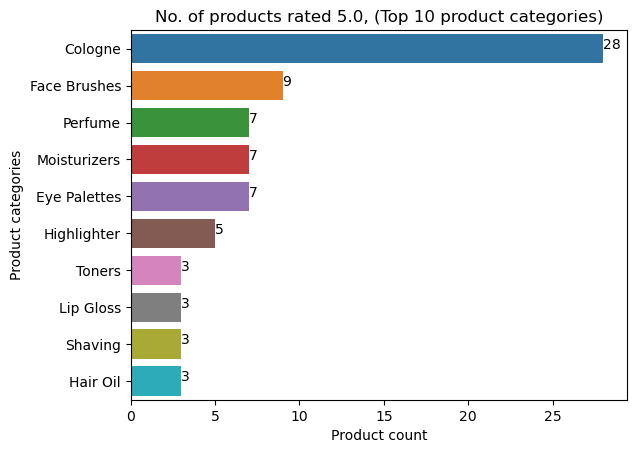

In [13]:
#filtering df to only include products rated 5.0, with n>=50 ratings
df_prodratingcat = df_sephora[(df_sephora["rating"] == 5.0) & (df_sephora["number_of_reviews"] >= 50)]

#grouping df by category, aggregating by product count, sorting by descending product count  
df_prodratingcat = df_prodratingcat.groupby("category").agg(
    product_count = ("category", "count")    
).reset_index().sort_values("product_count", ascending = False)

#extracts the top 10 categories by product count
df_prodratingcat = df_prodratingcat.head(10)

#barchart
sns.barplot(x = df_prodratingcat["product_count"], y = df_prodratingcat["category"], orient="h")

for index, value in enumerate(df_prodratingcat["product_count"]):
    plt.text(value, index, str(value))

plt.xlabel('Product count')
plt.ylabel('Product categories')
plt.title('No. of products rated 5.0, (Top 10 product categories)')
plt.show()

- From the chart above, Colognes have the most products with a perfect rating, followed by Face Brushes, Perfumes, Moisturizers and Eye Palettes, which form the top 5 categories.
- It is interesting to note that by a large margin, the colognes category has the most number of perfectly rated products. With Sephora's client base leaning majority female and cologne being a product marketed primarily towards men, it is unexpected to see that this category has the most number of highly well-received products. 

<i>*note: to ensure reliability of results, only products with a rating score of 5.0 and with 50 reviews or more were included in the chart above.</i>

<b>3. Which are the top 10 brands with the most 5.0 rated products?</b>

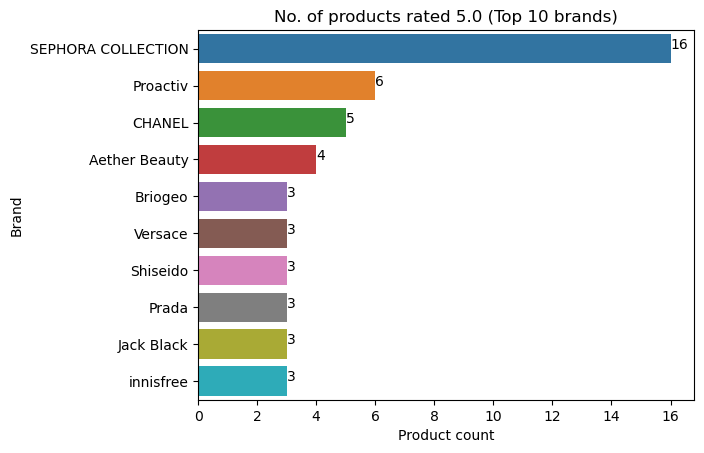

In [14]:
#filtering df to only include products rated 5.0, with n>=50 ratings
df_prodratingbrand = df_sephora[(df_sephora["rating"] == 5.0) & (df_sephora["number_of_reviews"] >= 50)]

#grouping df by brand, aggregating by product count, sorting by descending product count  
df_prodratingbrand = df_prodratingbrand.groupby("brand").agg(
    product_count = ("brand", "count")    
).reset_index().sort_values("product_count", ascending = False)

#extracts the top 10 brands by product count
df_prodratingbrand = df_prodratingbrand.head(10)

#barchart
sns.barplot(x = df_prodratingbrand["product_count"], y = df_prodratingbrand["brand"], orient="h")

for index, value in enumerate(df_prodratingbrand["product_count"]):
    plt.text(value, index, str(value))

plt.xlabel('Product count')
plt.ylabel('Brand')
plt.title('No. of products rated 5.0 (Top 10 brands)')
plt.show()

- Sephora collection has the most products with a perfect 5.0 rating. This is not too surprising as this brand has the most number of products being sold, as seen in the summary statistics previously. It has 496 products, which is more than double than that of the next highest brand, Clinique, at 234.
- Proactiv, CHANEL, Aether Beauty, and Briogeo make up the next 4 within the top 5 brands with the most perfectly rated products.

<i>*note: to ensure reliability of results, only products with a rating score of 5.0 and with 50 reviews or more were included in the chart above.</i>

<b>4. Which are the top 10 products with the most reviews? What notable characteristics do these popular products have compared with less popular products?</b>

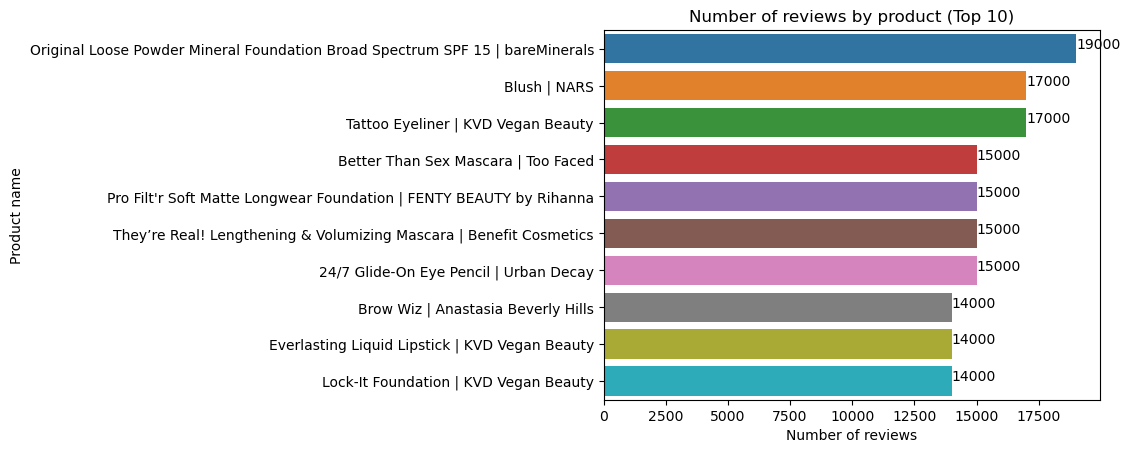

In [15]:
#sorts df by number of reviews in desc order, extracts top 10, 
df_prodreview = df_sephora.sort_values('number_of_reviews', ascending=False).head(10)

#define y-axis array to be used in barchart (product name | brand)
yaxs = df_prodreview["name"] + " | " + df_prodreview["brand"]

#barchart
sns.barplot(x = df_prodreview["number_of_reviews"], y = yaxs, orient="h")

for index, value in enumerate(df_prodreview["number_of_reviews"]):
    plt.text(value, index, str(value))

plt.xlabel('Number of reviews')
plt.ylabel('Product name')
plt.title('Number of reviews by product (Top 10)')
plt.show()

- The top 10 products with the most reviews are listed above. They are also considered as heavy outliers within the "number_of_reviews" variable as the median number of reviews per product is 46.
- Due to the large number of heavy outliers within the "number_of_reviews" variable, it would also be interesting to see if these products (that attract so much popularity) would have a different rating distribution from the rest of the products.

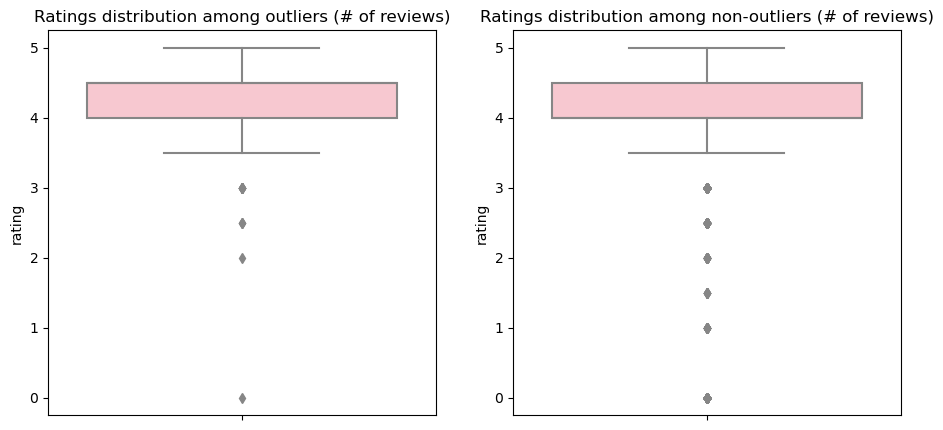

In [16]:
#calulation of outlier upper threshhold
Q1 = df_sephora['number_of_reviews'].quantile(0.25)
Q3 = df_sephora['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1
thresh_outlier_upper = Q3 + 1.5*IQR

#defining outlier and non-outlier dataframes
df_prodreview_outlier = df_sephora[df_sephora["number_of_reviews"] > thresh_outlier_upper]
df_prodreview_nonoutlier = df_sephora[df_sephora["number_of_reviews"] <= thresh_outlier_upper]

#defining lists referenced for boxplot loop
df_prodreview_all = [df_prodreview_outlier, df_prodreview_nonoutlier]
prodreview_bptitle = ["Ratings distribution among outliers (# of reviews)", "Ratings distribution among non-outliers (# of reviews)"]

#boxplot
plt.figure(figsize = (11,5))
for i in range(len(df_prodreview_all)):
    ax = plt.subplot(1,2, i+1)
    sns.boxplot(y=df_prodreview_all[i]["rating"], color = "pink", orient = "v")
    ax.set_title(prodreview_bptitle[i])

- It can be seen that regardless whether a product is popular or not, they tend to have a rating of around 3.5-5.0. Their measures of center and dispersion are also similar.
- This suggests that a product's popuarity does not have a significant impact on their rating, which is further supported by the low correlation coefficient between the two variables mentioned previously.
- Trendy products tend to draw additional praise, but also additional suspicion regarding how well their products work. From the data, it seems to suggest neither. It suggests that non-trendy products are just as well enjoyed as trendy products. 

<b>5. Which are the top 10 brands with the most reviews? What notable characteristics do these popular brands have compared with less popular brands?</b>

In [17]:
#groups dataframe by brand, aggregates sum of reviews and count of products
df_brandreview = df_sephora.groupby("brand").agg(
    sum_review = ("number_of_reviews", "sum"),
    product_count = ("number_of_reviews", "count")
).reset_index()

#sorts by desc no. of reviews and count, extracts top 10 entries
df_brandreview = df_brandreview.sort_values(["sum_review", "product_count"], ascending = False).head(10)
df_brandreview

,brand,sum_review,product_count
232,SEPHORA COLLECTION,121095,496
275,Too Faced,88405,81
279,Urban Decay,87273,76
23,Benefit Cosmetics,87237,93
136,KVD Vegan Beauty,86103,71
38,CLINIQUE,85435,234
322,tarte,80230,170
8,Anastasia Beverly Hills,77497,70
188,NARS,68949,57
301,bareMinerals,66063,57


- The brands with the most quantity of reviews are listed above. This helps to provide an impression of the popular brands within Sephora.
- However, it can be seen that some brands have a much higher product count than it's counterparts (SEPHORA COLLECTION, CLINIQUE, tarte), which could have been a contributing factor to the high number of reviews.
- It would thereby be meaningful to further explore how many reviews a product typically receives within each brand, to better understand the contributing factors towards how these brands were able to amass such a large number of product reviews. 

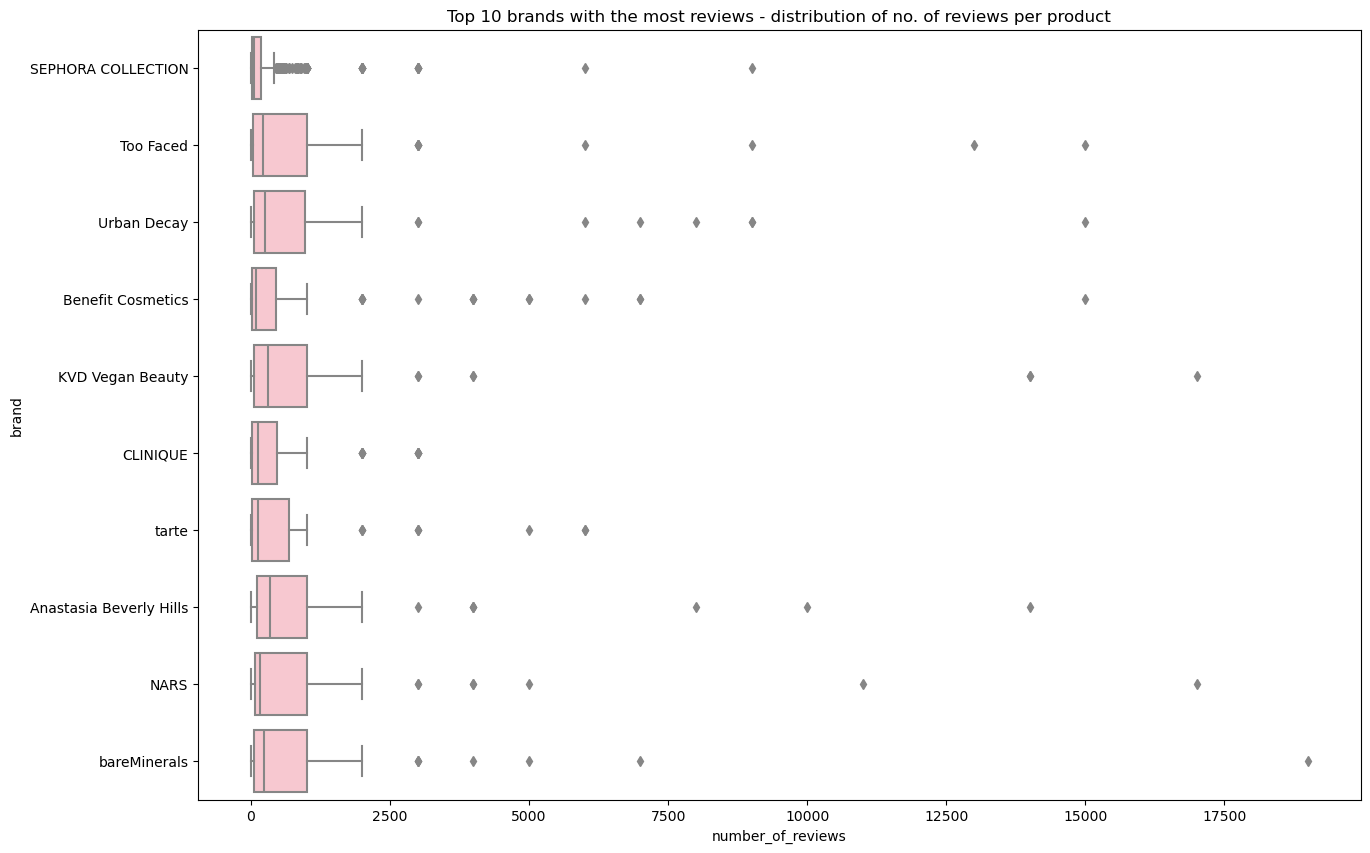

In [20]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    #filtering df to only include products with the above top 10 brands
    df_brandreview10 = df_sephora[df_sephora["brand"].isin(df_brandreview["brand"])]

    #custom sort df by above top 10 brands order
    df_brandreview10["brand"] = pd.Categorical(df_brandreview10["brand"], df_brandreview["brand"])
    df_brandreview10 = df_brandreview10.sort_values("brand")

    #bloxplot
    plt.figure(figsize = (15,10))
    brandreview10_boxplot = sns.boxplot(y = df_brandreview10["brand"], x = df_brandreview10["number_of_reviews"],  color = "pink", orient = "h")
    brandreview10_boxplot.set_title("Top 10 brands with the most reviews - distribution of no. of reviews per product")

In [19]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    #summary statistics of above brands
    df_brandreview10_ss = df_brandreview10.groupby("brand")[["brand" , "number_of_reviews"]].describe().round(1)
    display(df_brandreview10_ss)

number_of_reviews                                     \
                                    count    mean     std  min    25%    50%   
brand                                                                          
SEPHORA COLLECTION                  496.0   244.1   659.8  0.0   14.0   46.0   
Too Faced                            81.0  1091.4  2490.5  0.0   32.0  220.0   
Urban Decay                          76.0  1148.3  2537.2  0.0   47.8  252.5   
Benefit Cosmetics                    93.0   938.0  2157.6  0.0   18.0   90.0   
KVD Vegan Beauty                     71.0  1212.7  3057.8  0.0   50.0  302.0   
CLINIQUE                            234.0   365.1   596.3  0.0   19.0  121.0   
tarte                               170.0   471.9   891.5  0.0   18.0  127.0   
Anastasia Beverly Hills              70.0  1107.1  2299.3  0.0  103.2  342.5   
NARS                                 57.0  1209.6  2762.4  1.0   70.0  170.0   
bareMinerals                         57.0  1159.0  2755.9  1.0   59.0  241.0   

                                          
                            75%      max  
brand                                     
SEPHORA COLLECTION        173.5   9000.0  
Too Faced                1000.0  15000.0  
Urban Decay               977.5  15000.0  
Benefit Cosmetics         456.0  15000.0  
KVD Vegan Beauty         1000.0  17000.0  
CLINIQUE                  473.0   3000.0  
tarte                     679.0   6000.0  
Anastasia Beverly Hills  1000.0  14000.0  
NARS                     1000.0  17000.0  
bareMinerals             1000.0  19000.0

- It can be seen that though the cumulative number of product reviews within these top 10 brands high, this large number can be attributed to a select few products that amass an extremely high number of reviews.
- The bulk of products typically have reviews around the 50 - 1000 range (Q1-Q3) for most brands.
- This suggests that a typical brand in Sephora will not be able to amass the same quantity of reviews as the brands above unless they also posess serveral products that acheive such virality.
- Assuming that the number of reviews is an indicator of a product's popularity, it also suggests that a brand would not be able to achieve the same levels of popularity unless they also possses several viral products. 
- However, the exception to this would be brands which have an extremely large quantiy of products sold relative to other brands in Sephora, such as SEPHORA COLLECTION, CLINIQUE and tarte. They instead would be able to amass a large number of reviews within their brand due to the sheer volume of products sold.
- This can be seen via their bloxplots above. Compared to other brands on the list, despite generally having lower Q2 and Q3 values and outliers of a lower value, they were still able to make it onto the list above, likely due to the high number of products they sell. 


## Conclusion

##### The lists of the respective top 10 products/product categories/brands asked for in the research questions are displayed above, hence I won't be listing all 50 of them here. 
##### However, other key concluding observations are as follows:
- There is no significant correlation between the number of reviews a product has and its rating. This suggests that a product's rating is determined by other more influential factors. Potential factors could include: quality of the product, value for money, customer satisfaction, etc. This also suggests that even if a product amasses a large number of reviews(is popular), it does not mean that customers on the whole enjoy it significantly more or less than products that amass a smaller number of reviews(is less popular).
- Popular products can be distinctly identified based on their number of reviews. These products tend to have review numbers that are heavy outliers within the dataset, extending to up to 400+ times the median number of reviews.
- For a brand to amass a large quantity of reveiws accross its products, it would need to have multiple popular products, as defined above, in its catelogue. This can suggest that it is difficult for brands that are not as popular(have lesser reviews cumulatively) to reach the same levels of popularity as the top 10 brands(by cumulative reviews), as this likely hinges on having viral products, which is difficult to ensure.